In [65]:
import keras

## 손실함수 // 출력층 활성화 함수 // 메트릭 선택 가이드 라인
- 이진분류 : binary_crossentropy // sigmoid // accuracy
- 다중분류 : categorical_crossentropy // softmax // accuracy
- 임의값 회귀 : mse // 없음 // mae (mean absolute error)

In [66]:
keras.__version__

'2.3.1'

## MNIST

In [67]:
from keras.datasets import mnist

In [68]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [69]:
train_images.shape

(60000, 28, 28)

In [70]:
len(train_labels)

60000

In [71]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [72]:
train_labels[0]

5

In [73]:
train_images[0].shape

(28, 28)

In [74]:
test_images.shape

(10000, 28, 28)

## 이미지 확인

In [75]:
import matplotlib.pyplot as plt

In [76]:
train_labels[0]

5

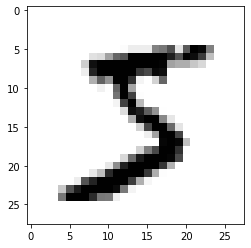

In [77]:
plt.imshow(train_images[0], cmap=plt.cm.binary)

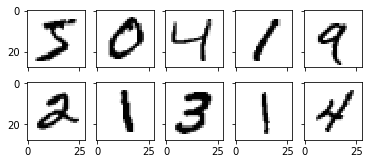

In [78]:
fig , axes = plt.subplots(2,5,sharex = True, sharey=True)

for i in range(2):
    for j in range(5):
        if i == 0:
            axes[i,j].imshow(train_images[(i*j+j)], cmap = plt.cm.binary)
        else:
            axes[i,j].imshow(train_images[(i*j+5)], cmap = plt.cm.binary)
            
plt.subplots_adjust(wspace=0.2, hspace= -0.5)

## 데이터 준비

In [79]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

## 레이블 범주형으로 변환

In [80]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [81]:
train_labels[0] #==5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 레이어 구성하기

In [82]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(64, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

## 모델 컴파일

In [83]:
network.compile(optimizer='adam', ##경사하강법 적용 // 역전파 알고리즘
               loss='categorical_crossentropy',
               metrics=['accuracy'])  ##분류에 대한 정확도를 보는것이기 때문에 accuracy

## 모델링

In [84]:
network_fit = network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.2515 - accuracy: 0.9277
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0932 - accuracy: 0.9715
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0570 - accuracy: 0.9827
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0417 - accuracy: 0.9871
Epoch 5/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0305 - accuracy: 0.9904
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0217 - accuracy: 0.9936
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0165 - accuracy: 0.9950
Epoch 8/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0175 - accuracy: 0.9943
Epoch 9/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0122 - accuracy: 0.9960
Epoch 10/10
60000/60000 [==============================

## 모델 확인

In [46]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [50]:
network.save('mnist_test.h5')

In [ ]:
network.save

In [51]:
from keras.models import load_model

In [52]:
network_load = load_model('mnist_test.h5')

In [58]:
network_load.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [59]:
# network.get_weights()

In [60]:
test_loss , test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 63us/step


In [61]:
print('test_acc', test_acc)

test_acc 0.9830999970436096
